<a href="https://colab.research.google.com/github/kamillaknudsen/tmdl/blob/main/tmdl_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
from google.colab import auth
import gspread
from google.auth import default

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


In [103]:
shark_attacks = pd.read_csv("/content/attacks.csv", encoding='latin-1')
shark_attacks
shark_attacks.isnull().sum()

,0
Case Number,17021
Date,19421
Year,19423
Type,19425
Country,19471
Area,19876
Location,19961
Activity,19965
Name,19631
Sex,19986


In [104]:
shark_attacks.drop(["Unnamed: 22", "Unnamed: 23"], axis=1, inplace=True)

In [105]:
shark_attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


[link text](https://docs.google.com/spreadsheets/d/1X0Ft--uvJDsQ6LIvuKm0PU-3hw_GalcwQ_WLDuX7ctM/edit?gid=1179288347#gid=1179288347)

In [106]:
shark_attacks.drop(["Case Number", "Year", "Area", "Location", "Name", "Injury",
         "Investigator or Source", "pdf", "Age", "href formula", "href",
         "Case Number.1", "Case Number.2", "original order"], axis=1, inplace=True)

In [107]:
shark_attacks.head()

,Date,Type,Country,Activity,Sex,Fatal (Y/N),Time,Species
0,25-Jun-2018,Boating,USA,Paddling,F,N,18h00,White shark
1,18-Jun-2018,Unprovoked,USA,Standing,F,N,14h00 -15h00,NaN
2,09-Jun-2018,Invalid,USA,Surfing,M,N,07h45,NaN
3,08-Jun-2018,Unprovoked,AUSTRALIA,Surfing,M,N,NaN,2 m shark
4,04-Jun-2018,Provoked,MEXICO,Free diving,M,N,NaN,"Tiger shark, 3m"


In [108]:
shark_attacks['Fatal (Y/N)'] = shark_attacks['Fatal (Y/N)'].replace(['N'],0)
shark_attacks['Fatal (Y/N)'] = shark_attacks['Fatal (Y/N)'].replace(['Y'],1)
shark_attacks

,Date,Type,Country,Activity,Sex,Fatal (Y/N),Time,Species
0,25-Jun-2018,Boating,USA,Paddling,F,0,18h00,White shark
1,18-Jun-2018,Unprovoked,USA,Standing,F,0,14h00 -15h00,NaN
2,09-Jun-2018,Invalid,USA,Surfing,M,0,07h45,NaN
3,08-Jun-2018,Unprovoked,AUSTRALIA,Surfing,M,0,NaN,2 m shark
4,04-Jun-2018,Provoked,MEXICO,Free diving,M,0,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
shark_attacks.columns = ["Date", "Type", "Country", "Activity", "Sex", "Fatal", "Time", "Species"]

In [110]:
shark_attacks = shark_attacks.dropna(subset=['Fatal', 'Species', 'Activity', 'Country'])

In [111]:
import re
import string

def preprocess_text(text):

    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d', '', text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [re.sub(r'(.)\1{1,}', r'\1\1', word) for word in words]
    words = [word.strip() for word in words if len(word.strip()) > 1]

    text = " ".join(words)
    return text

In [112]:
shark_attacks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830 entries, 0 to 6296
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2830 non-null   object
 1   Type      2830 non-null   object
 2   Country   2830 non-null   object
 3   Activity  2830 non-null   object
 4   Sex       2623 non-null   object
 5   Fatal     2830 non-null   object
 6   Time      1743 non-null   object
 7   Species   2830 non-null   object
dtypes: object(8)
memory usage: 199.0+ KB


In [113]:
shark_attacks['Species'] = shark_attacks['Species'].apply(preprocess_text)
shark_attacks['Species'] = shark_attacks["Species"].apply(lambda text: text.replace("to", "").strip())
shark_attacks['Species'] = shark_attacks["Species"].apply(lambda text: text.replace("feet", "").strip())
shark_attacks['Species'] = shark_attacks["Species"].apply(lambda text: text.replace("less than", "").strip())
shark_attacks['Species'] = shark_attacks["Species"].apply(lambda text: text.replace("possibly", "").strip())
shark_attacks['Species'] = shark_attacks["Species"].apply(lambda text: text.replace("small", "").strip())
shark_attacks['Species'] = shark_attacks["Species"].apply(lambda text: text.replace("tall", "").strip())
shark_attacks['Species'] = shark_attacks["Species"].apply(lambda text: text.replace("brown", "").strip())
shark_attacks['Species'] = shark_attacks["Species"].apply(lambda text: text.replace("cm", "").strip())
shark_attacks['Species'] = shark_attacks["Species"].apply(lambda text: text.replace("greycolored", "").strip())

def or_split(text):
    if "or" in text:
        return text.split("or")[0].strip()
    else:
        return text

shark_attacks['Species'] = shark_attacks["Species"].apply(or_split)

def len_strip(text):
    if len(text.split()) > 2:
        words = text.split()[:2]
        text = " ".join(words)
        return text
    else:
        return text

shark_attacks['Species'] = shark_attacks["Species"].apply(len_strip)

shark_attacks['Species'] = shark_attacks["Species"].replace({
 'shark': 'unknown',
 'juvenile blacktip': 'blacktip shark',
 'blacktip': 'blacktip shark',
 'tp shark': 'unknown',
 'whitetip reef': 'reef shark',
 'thought involve': 'unknown',
 'shark  blactip': 'blacktip shark',
 'p': 'unknown',
 'shark involvement': 'unknown',
 '': 'unknown',
 'yearold pound': 'unknown',
 'shark tiger': 'tiger shark',
 'spinner': 'spinner shark',
 'grey reef': 'reef shark',
 'juvenile white': 'white shark',
 'unknown but': 'unknown',
 'unidentified species': 'unknown',
 '\x93  shark\x94': 'unknown',
 '\x93\x94 shark': 'unknown',
 'bite diameter': 'unknown',
 'species unidentified': 'unknown',
 'grey col': 'unknown',
 'hammerhead': 'hammerhead shark',
 'shark bull': 'bull shark',
 'shark oth': 'unknown',
 'questionable incident': 'unknown',
 'large white': 'white shark',
 'shark  blacktip': 'blacktip shark',
 'shark was': 'unknown',
 'shark probably': 'unknown',
 'sh': 'unknown',
 'shark seen': 'unknown',
 'shark spinner': 'spinner shark',
 'young shark': 'unknown',
 'unidentified shark': 'unknown',
 'said involve': 'unknown',
 'bull': 'bull shark',
 'lb shark': 'unknown',
 'sixgill': 'unknown',
 'hammerhead sharko': 'hammerhead shark',
 'bull sandbar': 'bull shark',
 'maculpinnis': 'unknown',
 'local auth': 'unknown',
 'hand found': 'unknown',
 'h': 'unknown',
 'larger shark': 'unknown',
 'rep': 'unknown',
 'leucas': 'unknown'
})

<ipython-input-113-ef8635c3732b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks['Species'] = shark_attacks['Species'].apply(preprocess_text)
<ipython-input-113-ef8635c3732b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks['Species'] = shark_attacks["Species"].apply(lambda text: text.replace("to", "").strip())
<ipython-input-113-ef8635c3732b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [114]:
shark_attacks

,Date,Type,Country,Activity,Sex,Fatal,Time,Species
0,25-Jun-2018,Boating,USA,Paddling,F,0,18h00,white shark
3,08-Jun-2018,Unprovoked,AUSTRALIA,Surfing,M,0,NaN,unknown
4,04-Jun-2018,Provoked,MEXICO,Free diving,M,0,NaN,tiger shark
6,03-Jun-2018,Unprovoked,BRAZIL,Swimming,M,1,Late afternoon,tiger shark
7,27-May-2018,Unprovoked,USA,Fishing,M,0,NaN,lemon shark
...,...,...,...,...,...,...,...,...
6276,Early 1930s,Unprovoked,BELIZE,Standing,M,1,NaN,tiger shark
6293,Before 1906,Unprovoked,AUSTRALIA,Fishing,M,1,NaN,blue pointer
6294,Before 1906,Unprovoked,AUSTRALIA,Fishing,M,1,NaN,blue pointer
6295,Before 1906,Unprovoked,AUSTRALIA,Fishing,M,1,NaN,blue pointers


In [115]:
shark_attacks["Activity"].value_counts().head(10)

,count
Activity,
Surfing,554
Swimming,322
Fishing,245
Spearfishing,231
Wading,72
Snorkeling,64
Diving,55
Scuba diving,51
Standing,46


In [116]:
def activity_split(text):
    if "/" in text:
        text = text.split("/")[0].strip()
        return text

    else:
        return text

shark_attacks["Activity"] = shark_attacks["Activity"].apply(activity_split)

def activity_finder(text):
    activities = ["Surfing", "Swimming", "Wading", "Spearfishing", "Standing", "Fishing", "Snorkeling", "Scuba diving", "boarding"]
    for i in range(len(activities)):
        if activities[i] in text:
            return activities[i]

    return "Other"

shark_attacks["Activity"] = shark_attacks["Activity"].apply(activity_finder)
shark_attacks = shark_attacks[["Type", "Country", "Activity", "Sex", "Species", "Fatal"]]
shark_attacks.head()

<ipython-input-116-9f279d68b627>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks["Activity"] = shark_attacks["Activity"].apply(activity_split)
<ipython-input-116-9f279d68b627>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks["Activity"] = shark_attacks["Activity"].apply(activity_finder)


,Type,Country,Activity,Sex,Species,Fatal
0,Boating,USA,Other,F,white shark,0
3,Unprovoked,AUSTRALIA,Surfing,M,unknown,0
4,Provoked,MEXICO,Other,M,tiger shark,0
6,Unprovoked,BRAZIL,Swimming,M,tiger shark,1
7,Unprovoked,USA,Fishing,M,lemon shark,0


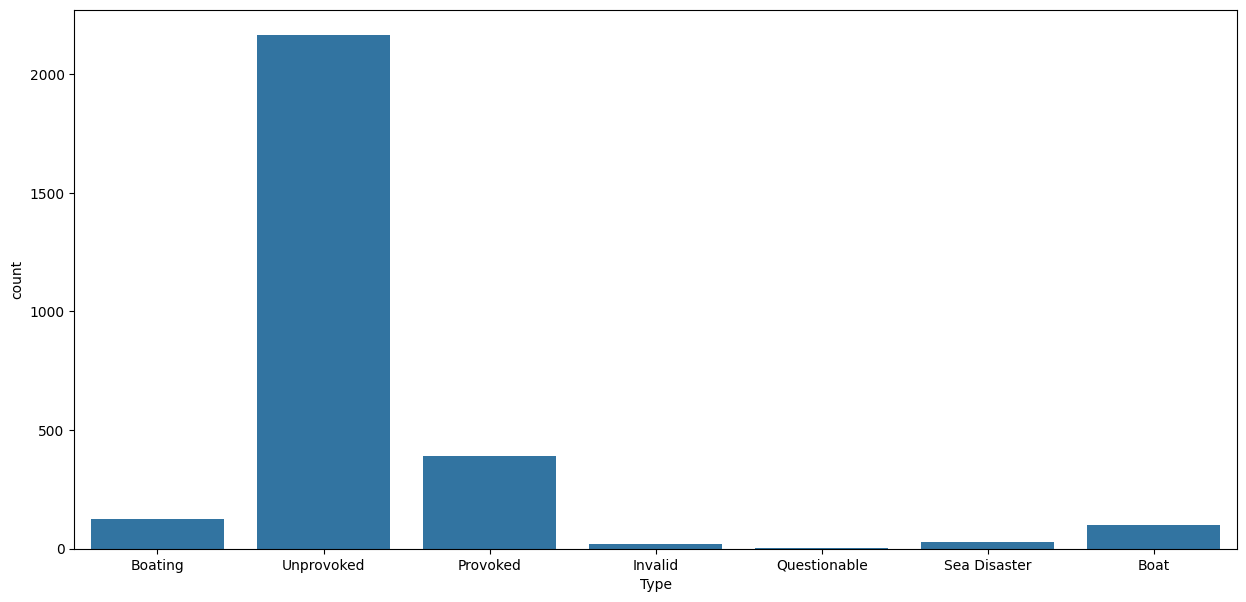

In [117]:
plt.figure(figsize=(15, 7))
sns.countplot(x="Type", data=shark_attacks)
plt.show()

In [118]:
shark_attacks["Country"].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'COSTA RICA',
       'MALDIVES', 'SOUTH AFRICA', 'THAILAND', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'CUBA', 'NEW ZEALAND', 'SPAIN',
       'EGYPT', 'REUNION', 'UNITED KINGDOM', 'PHILIPPINES', 'INDONESIA',
       'COLUMBIA', 'FRENCH POLYNESIA', 'UNITED ARAB EMIRATES', 'FIJI',
       'ATLANTIC OCEAN', 'JAPAN', 'ST. MARTIN', 'FRANCE', 'BELIZE',
       'JAMAICA', 'TONGA', 'SCOTLAND', 'ITALY', 'TAIWAN',
       'PAPUA NEW GUINEA', 'RUSSIA', 'SEYCHELLES', 'TURKS & CAICOS',
       'MALTA', 'VIETNAM', 'MOZAMBIQUE', 'GUAM', 'CROATIA', 'PANAMA',
       'SOLOMON ISLANDS', 'NORWAY', 'Sierra Leone', 'ST. MAARTIN',
       'GRAND CAYMAN', 'CHINA', 'VANUATU', 'SOUTH KOREA', 'MADAGASCAR',
       ' TONGA', 'URUGUAY', 'VENEZUELA', 'INDIA', 'MICRONESIA',
       'CARIBBEAN SEA', 'CANADA', 'OKINAWA', 'TANZANIA',
       'MARSHALL ISLANDS', 'MAURITIUS', 'SENEGAL', 'EGYPT / ISRAEL',
       'HONG KONG', 'CHILE', 'EL SALVADOR', 

In [119]:
region_map = {
    'USA': 'North America',
    'MEXICO': 'North America',
    'CANADA': 'North America',
    'COSTA RICA': 'Central America',
    'BELIZE': 'Central America',
    'JAMAICA': 'Caribbean',
    'BAHAMAS': 'Caribbean',
    'ST. MARTIN': 'Caribbean',
    'ST. MAARTIN': 'Caribbean',
    'GRAND CAYMAN': 'Caribbean',
    'CUBA': 'Caribbean',
    'TRINIDAD & TOBAGO': 'Caribbean',
    'HAITI': 'Caribbean',
    'SAN DOMINGO': 'Caribbean',
    'CURACAO': 'Caribbean',

    'BRAZIL': 'South America',
    'ECUADOR': 'South America',
    'URUGUAY': 'South America',
    'VENEZUELA': 'South America',
    'CHILE': 'South America',
    'ARGENTINA': 'South America',

    'ENGLAND': 'Europe',
    'UNITED KINGDOM': 'Europe',
    'SCOTLAND': 'Europe',
    'FRANCE': 'Europe',
    'SPAIN': 'Europe',
    'ITALY': 'Europe',
    'CROATIA': 'Europe',
    'PORTUGAL': 'Europe',
    'GREECE': 'Europe',
    'NORWAY': 'Europe',
    'MALTA': 'Europe',
    'CYPRUS': 'Europe',
    'MONTENEGRO': 'Europe',

    'AUSTRALIA': 'Oceania',
    'NEW ZEALAND': 'Oceania',
    'FIJI': 'Oceania',
    'TONGA': 'Oceania',
    'NEW CALEDONIA': 'Oceania',
    'SOLOMON ISLANDS': 'Oceania',
    'VANUATU': 'Oceania',
    'PAPUA NEW GUINEA': 'Oceania',
    'WESTERN SAMOA': 'Oceania',
    'AMERICAN SAMOA': 'Oceania',
    'MICRONESIA': 'Oceania',
    'MARSHALL ISLANDS': 'Oceania',
    'PALAU': 'Oceania',
    'NEW GUINEA': 'Oceania',
    'FEDERATED STATES OF MICRONESIA': 'Oceania',
    'NEW BRITAIN': 'Oceania',

    'SOUTH AFRICA': 'Africa',
    'MOZAMBIQUE': 'Africa',
    'EGYPT': 'Africa',
    'REUNION': 'Africa',
    'SEYCHELLES': 'Africa',
    'MAURITIUS': 'Africa',
    'ANGOLA': 'Africa',
    'TANZANIA': 'Africa',
    'SENEGAL': 'Africa',
    'Sierra Leone': 'Africa',
    'SUDAN': 'Africa',
    'KENYA': 'Africa',
    'MAYOTTE': 'Africa',

    'MALDIVES': 'Asia',
    'THAILAND': 'Asia',
    'PHILIPPINES': 'Asia',
    'INDONESIA': 'Asia',
    'JAPAN': 'Asia',
    'TAIWAN': 'Asia',
    'SOUTH KOREA': 'Asia',
    'CHINA': 'Asia',
    'INDIA': 'Asia',
    'SRI LANKA': 'Asia',
    'VIETNAM': 'Asia',
    'HONG KONG': 'Asia',
    'IRAN': 'Asia',
    'IRAQ': 'Asia',
    'SAUDI ARABIA': 'Asia',
    'YEMEN': 'Asia',
    'UNITED ARAB EMIRATES': 'Asia',
    'BAHREIN': 'Asia',

    'ATLANTIC OCEAN': 'Oceans',
    'NORTH ATLANTIC OCEAN': 'Oceans',
    'MID ATLANTIC OCEAN': 'Oceans',
    'SOUTH ATLANTIC OCEAN': 'Oceans',
    'PACIFIC OCEAN': 'Oceans',
    'NORTH PACIFIC OCEAN': 'Oceans',
    'SOUTH PACIFIC OCEAN': 'Oceans',
    'SOUTHWEST PACIFIC OCEAN': 'Oceans',
    'SOUTH CHINA SEA': 'Oceans',
    'INDIAN OCEAN': 'Oceans',
    'PERSIAN GULF': 'Oceans',
    'MEDITERRANEAN SEA': 'Oceans',
    'RED SEA': 'Oceans',
    'CARIBBEAN SEA': 'Oceans',
    'NORTH SEA': 'Oceans',

    'EGYPT / ISRAEL': 'Middle East',
    'OKINAWA': 'Asia',
    'JOHNSTON ISLAND': 'Oceania',
    'BRITISH ISLES': 'Europe',
    'BRITISH WEST INDIES': 'Caribbean',
    'ANDAMAN / NICOBAR ISLANDAS': 'Asia',
    'GEORGIA': 'North America',
    'Fiji': 'Oceania',
}


<ipython-input-120-f4ff2b19da4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks["Region"] = shark_attacks["Country"].map(region_map)


<function matplotlib.pyplot.show(close=None, block=None)>

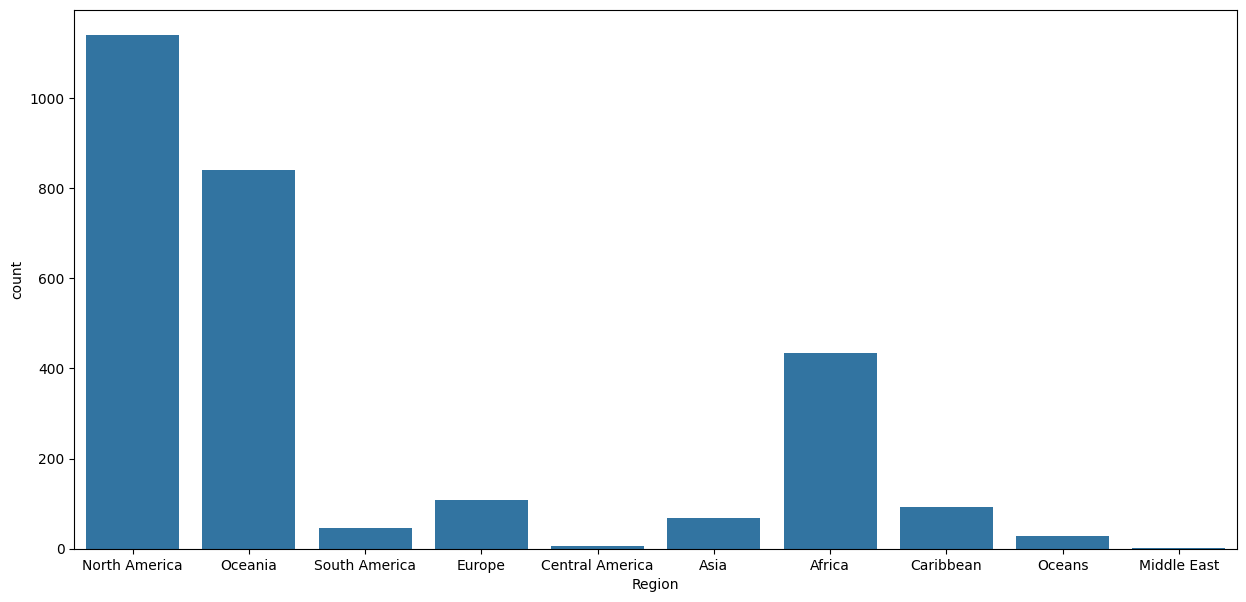

In [120]:
shark_attacks["Region"] = shark_attacks["Country"].map(region_map)

plt.figure(figsize=(15, 7))
sns.countplot(x="Region", data=shark_attacks)
plt.show

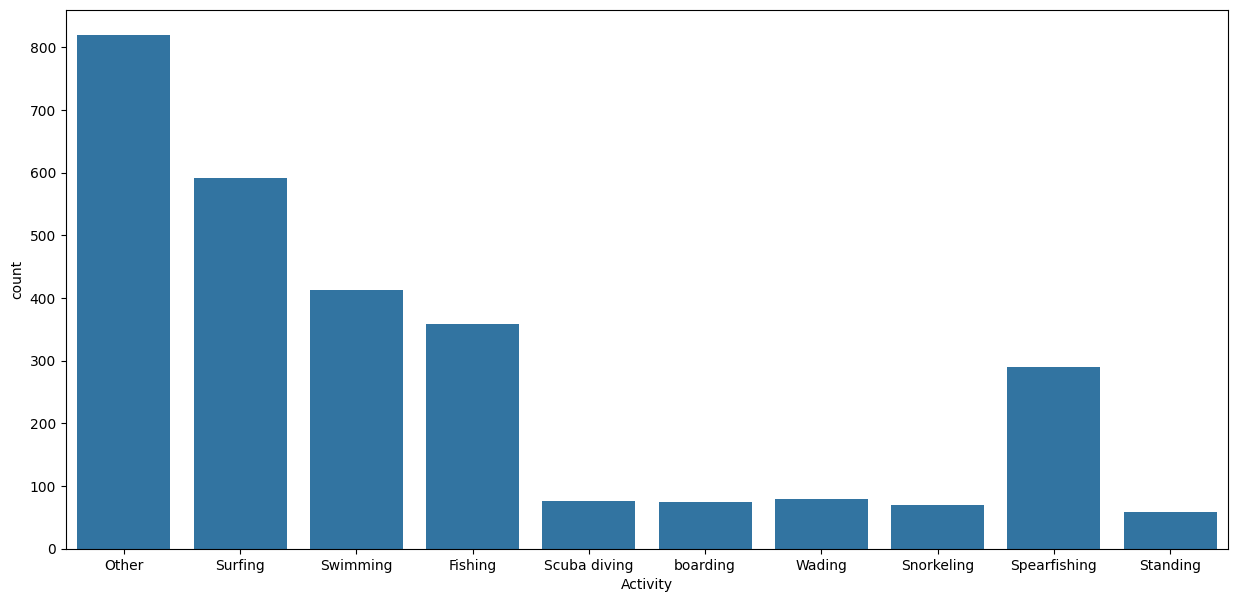

In [121]:
plt.figure(figsize=(15, 7))
sns.countplot(x="Activity", data=shark_attacks)
plt.show()

In [122]:
shark_attacks["Sex"] = shark_attacks["Sex"].replace({
    "lli": "F"
})
shark_attacks = shark_attacks[shark_attacks["Sex"].isin(["M","F"])]

<ipython-input-122-e8cecc6928a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks["Sex"] = shark_attacks["Sex"].replace({


<Axes: xlabel='Sex', ylabel='count'>

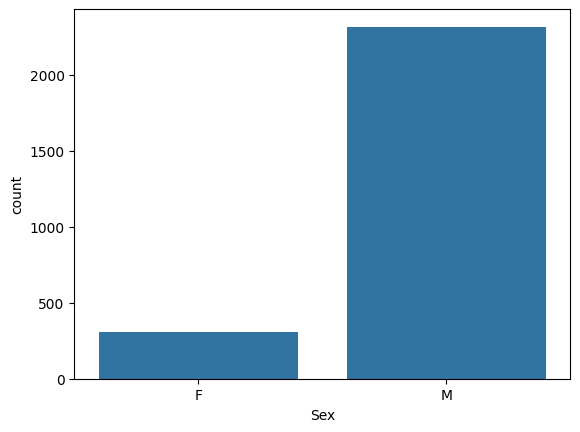

In [123]:
sns.countplot(x="Sex", data=shark_attacks)

In [124]:
shark_attacks["Species"].unique()

array(['white shark', 'unknown', 'tiger shark', 'lemon shark',
       'bull shark', 'reef shark', 'invalid incident', 'tawny nurse',
       'questionable', 'juvenile bull', 'wobbegong shark',
       'blacktip shark', 'wobbegong', 'injury believed',
       'galapagos shark', 'juvenile nurse', 'nurse shark',
       'cookiecutter shark', 'spinner shark', 'oceanic whitetip',
       'blue shark', 'sevengill shark', 'caribbean reef',
       'broadnose sevengill', 'angel shark', 'dogfish shark',
       'mako shark', 'bronze whaler', 'sandtiger shark', 'bull sharks',
       'silky shark', 'hammerhead sp', 'juvenile shark',
       'hammerhead shark', 'foot shark', 'blacktip reef',
       'raggedoth shark', 'goblin shark', 'juvenile tiger', 'metre shark',
       'sandbar shark', 'tawney nurse', 'gill shark', 'salmon shark',
       'grey nurse', 'sharks', 'allegedly tiger', 'zambesi shark',
       'kg shark', 'thresher shark', 'spurdog', 'dusky shark',
       'starry smoothhound', 'tiger sharks',

In [125]:
species_map = {
    # White
    'white shark': 'White',
    'white sharks': 'White',
    'female white': 'White',
    'believed white': 'White',
    'unknown white': 'White',

    # Tiger
    'tiger shark': 'Tiger',
    'tiger sharks': 'Tiger',
    'juvenile tiger': 'Tiger',
    'allegedly tiger': 'Tiger',
    'large tiger': 'Tiger',

    # Bull / Zambezi
    'bull shark': 'Bull',
    'bull sharks': 'Bull',
    'juvenile bull': 'Bull',
    'zambesi shark': 'Bull',
    'zambezi shark': 'Bull',
    'six zambesi': 'Bull',
    'lb zambesi': 'Bull',


    # Nurse
    'nurse shark': 'Nurse',
    'juvenile nurse': 'Nurse',
    'tawny nurse': 'Nurse',
    'tawney nurse': 'Nurse',
    'grey nurse': 'Nurse',

    # Reef
    'reef shark': 'Reef',
    'caribbean reef': 'Reef',
    'gray reef': 'Reef',
    'blacktip reef': 'Reef',

    # Blacktip
    'blacktip shark': 'Blacktip',
    'miami blacktip': 'Blacktip',

    # Wobbegong
    'wobbegong': 'Wobbegong',
    'wobbegong shark': 'Wobbegong',
    'wobbegongs': 'Wobbegong',

    # Mako
    'mako shark': 'Mako',
    'longfin mako': 'Mako',
    'shark mako': 'Mako',

    # Hammerhead
    'hammerhead shark': 'Hammerhead',
    'hammerhead sp': 'Hammerhead',
    'great hammerhead': 'Hammerhead',
    'scalloped hammerhead': 'Hammerhead',
    'large hammerhead': 'Hammerhead',

    # Blue
    'blue shark': 'Blue',
    'blue sharks': 'Blue',
    'blue pointer': 'Blue',
    'blue pointers': 'Blue',
    'blue nose': 'Blue',
    'blue nosed': 'Blue',
    'bluenosed shark': 'Blue',

    # Bronze Whaler
    'bronze whaler': 'Bronze Whaler',
    'shark bronze': 'Bronze Whaler',

    # Grouped as Other
    'cookiecutter shark': 'Other',
    'spinner shark': 'Other',
    'silky shark': 'Other',
    'dusky shark': 'Other',
    'juvenile dusky': 'Other',
    'sandbar shark': 'Other',
    'sandtiger shark': 'Other',
    'possibily sandtiger': 'Other',
    'thresher shark': 'Other',
    'thresher': 'Other',
    'lb thresher': 'Other',
    'basking shark': 'Other',
    'oceanic whitetip': 'Other',
    'shark whitetip': 'Other',
    'whitetipped reef': 'Other',
    'whtietip reef': 'Other',

    # Unknowns and Noise
    'unknown': 'Unknown',
    'unidentified': 'Unknown',
    'species unknown': 'Unknown',
    'invalid incident': 'Unknown',
    'questionable': 'Unknown',
    'sharks': 'Unknown',
    'shark species': 'Unknown',
    'sharks involved': 'Unknown',
    'injury believed': 'Unknown',
    'on anglers': 'Unknown',
    'though involve': 'Unknown',
    'remains recovered': 'Unknown',
    'shark had': 'Unknown',
    'next m': 'Unknown',
    'surviv': 'Unknown',
    'bitten by': 'Unknown',
    'attacked by': 'Unknown',
    'his hand': 'Unknown',
    'said be': 'Unknown',
    'shark caught': 'Unknown',
    'identified as': 'Unknown',
    'comrades saw': 'Unknown',
    'the fish': 'Unknown',
    'days later': 'Unknown',
    'm': 'Unknown',
    'acc': 'Unknown',
}


In [126]:
shark_attacks['Species_cleaned'] = shark_attacks['Species'].str.lower().map(species_map)

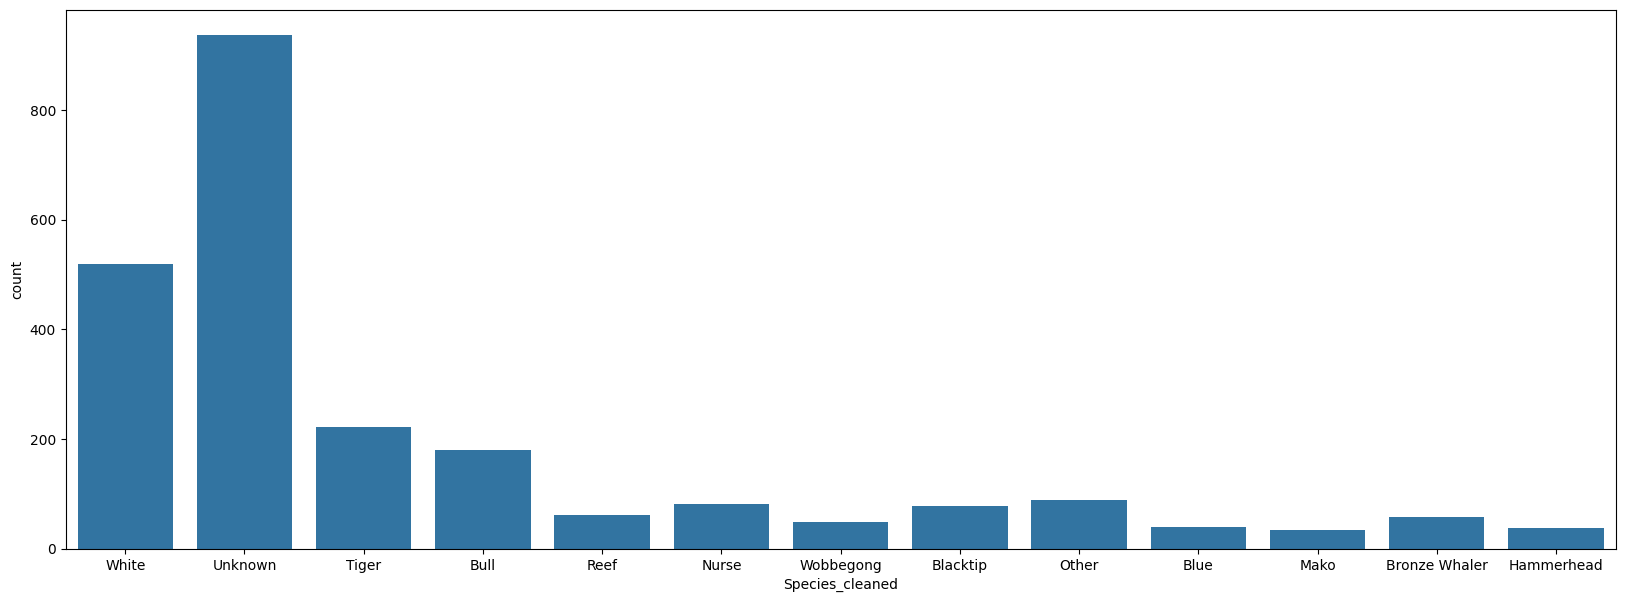

In [127]:
plt.figure(figsize=(20, 7))
sns.countplot(x="Species_cleaned", data=shark_attacks)
plt.show()

In [128]:
shark_attacks = shark_attacks[shark_attacks["Fatal"].isin([0, 1])]

<Axes: xlabel='Fatal', ylabel='count'>

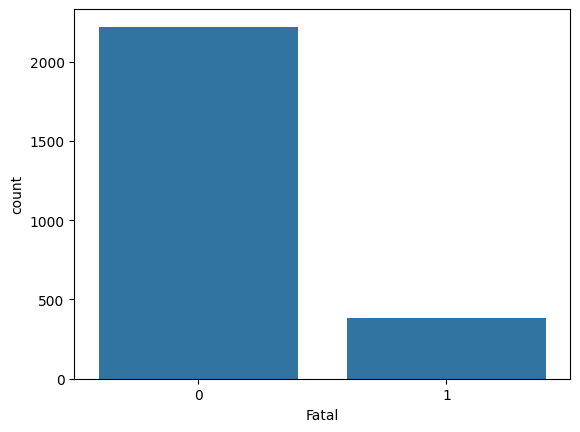

In [129]:
sns.countplot(x="Fatal", data=shark_attacks)

In [149]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, SimpleRNN
from sklearn.preprocessing import LabelEncoder

features = ['Species_cleaned', 'Region', 'Activity']
target = 'Fatal'

shark_attacks = shark_attacks.dropna(subset=features + [target])

shark_attacks['Fatal'] = pd.to_numeric(shark_attacks['Fatal'], errors='coerce')
shark_attacks = shark_attacks.dropna(subset=['Fatal'])
shark_attacks['Fatal'] = shark_attacks['Fatal'].astype(int)

label_encoder = LabelEncoder()
shark_attacks['Fatal_encoded'] = label_encoder.fit_transform(shark_attacks['Fatal'])

shark_attacks_encoded = pd.get_dummies(shark_attacks[features],
                                      columns=features,
                                      dtype=float)

x = shark_attacks_encoded
y = shark_attacks['Fatal_encoded']


# Split the data into training and testing sets (80% for training, 20% for testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

num_classes = len(label_encoder.classes_)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7986 - loss: 0.6244
Test accuracy: 0.7980561852455139


In [153]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

#Compile th model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


# Evaluate the model
test_loss, test_acc = model.evaluate(x_train, y_train)
print('Test accuracy:', test_acc)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8261 - loss: 0.4953 - val_accuracy: 0.8402 - val_loss: 0.3884
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8508 - loss: 0.3691 - val_accuracy: 0.8467 - val_loss: 0.3633
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8498 - loss: 0.3488 - val_accuracy: 0.8510 - val_loss: 0.3548
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8484 - loss: 0.3551 - val_accuracy: 0.8337 - val_loss: 0.3532
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8756 - loss: 0.3294 - val_accuracy: 0.8315 - val_loss: 0.3524
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8620 - loss: 0.3371 - val_accuracy: 0.8575 - val_loss: 0.3496
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8553 - loss: 0.3358 - val_accuracy: 0.8207 - val_loss: 0.3492
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8726 - loss: 0.3245 - val_accuracy: 0.8207 - val_loss: 0.3

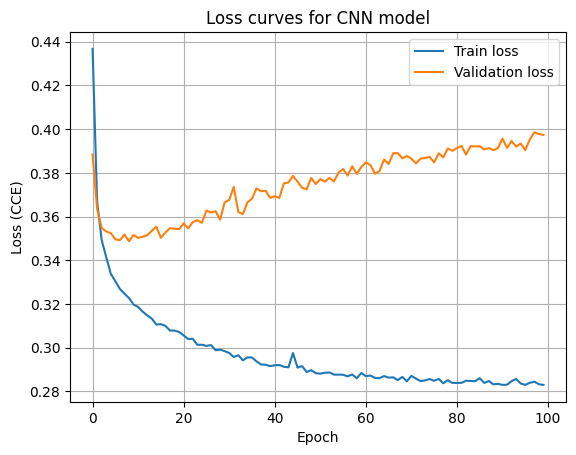

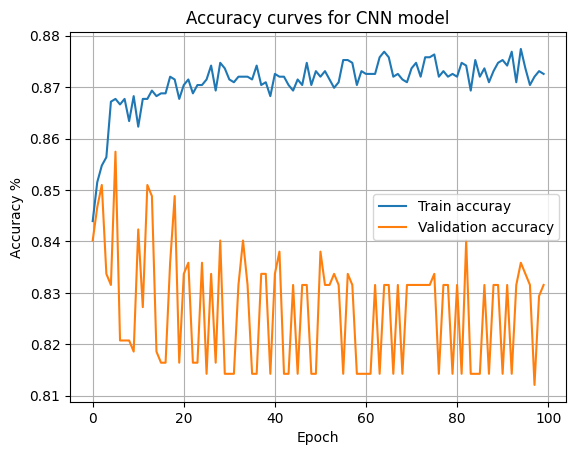

In [154]:
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.ylabel("Loss (CCE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.title("Loss curves for CNN model")
plt.show()

plt.plot(history.history["accuracy"], label="Train accuray")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.ylabel("Accuracy %")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.title("Accuracy curves for CNN model")
plt.show()